In [6]:
#Title : Using Classfication to predict the game results between 2 top500 tennis players

#Introduction

#Background: Tennis has been a very popular sport worldwidely for a very long time. People are especially curious about the results
# of certain games when it comes to some major tournaments like The French Open. That is why our group want to use the existing 
# data to try to create the most precise model to help better predict the game results.

#Question: Our group wants to find out which factors would affect the results of the games and how much the impacts are. 
# After that, we want to create a classifictation model that uses the factors to help predict the result of the games.

#Datasets used: player_stat.csv and atp2017-2019.csv

#Data analysis
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)
1
url1 <- "https://drive.google.com/uc?export=download&id=1fOQ8sy_qMkQiQEAO6uFdRX4tLI8EpSTn"
url2 <- "https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS"




In [23]:
atp2017_2019 <- read_csv(url1)
player_stat <- read_csv(url2)

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
slice(atp2017_2019, 1:6)

...1,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,⋯,54,34,20,14,10,15,9,3590,16,1977
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,⋯,52,36,7,10,10,13,16,1977,239,200
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,⋯,27,15,6,8,1,5,9,3590,40,1050
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NA,⋯,60,38,9,11,4,6,239,200,31,1298
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4,⋯,56,46,19,15,2,4,16,1977,18,1855
5,2019-M020,Brisbane,Hard,32,A,20181231,295,104871,NA,⋯,54,40,18,15,6,9,40,1050,185,275


In [45]:
atp <- atp2017_2019 %>%
    select(tourney_id, surface, winner_name, loser_name, winner_age, loser_age, winner_hand, loser_hand, winner_ht, loser_ht,winner_rank, loser_rank) %>%
    separate(col = tourney_id, into = c("Year", "Game name"), sep = "-") %>%
    mutate(Year = as.factor(Year)) %>%
    mutate(surface = as.factor(surface)) %>%
    mutate(winner_hand = as.factor(winner_hand)) %>%
    mutate(loser_hand = as.factor(loser_hand))
atp


Warning message:
“Expected 2 pieces. Additional pieces discarded in 325 rows [2445, 2446, 2447, 2448, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 2458, 2459, 2460, 2461, 2462, 2463, 2464, ...].”


Year,Game name,surface,winner_name,loser_name,winner_age,loser_age,winner_hand,loser_hand,winner_ht,loser_ht,winner_rank,loser_rank
<fct>,<chr>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
2019,M020,Hard,Kei Nishikori,Daniil Medvedev,29.00479,22.88569,R,R,178,NA,9,16
2019,M020,Hard,Daniil Medvedev,Jo Wilfried Tsonga,22.88569,33.70568,R,R,NA,188,16,239
2019,M020,Hard,Kei Nishikori,Jeremy Chardy,29.00479,31.88227,R,R,178,188,9,40
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2017,M,Hard,Jo Wilfried Tsonga,Steve Darcis,32.59411,33.68925,R,R,188,178,15,76
2017,M,Hard,David Goffin,Jo Wilfried Tsonga,26.95414,32.59411,R,R,163,188,7,15
2017,M,Hard,Lucas Pouille,Steve Darcis,23.73990,33.68925,R,R,185,178,18,76


In [46]:
Game_per_year <- atp %>%
    group_by(Year) %>%
    summarize(n=n())
Game_per_year

Year,n
<fct>,<int>
2017,1960
2018,2343
2019,2563


In [47]:
Surface_count <- atp %>%
    group_by(surface) %>%
    summarize(n=n())
Surface_count

surface,n
<fct>,<int>
Clay,2099
Grass,808
Hard,3942
None,17


In [48]:
Age_mean <-  summarize (atp,
                        winner_age_mean = mean(winner_age),
                        loser_age_mean = mean(loser_age))
Age_mean
# no apperant differences in average age of the winners and the losers


winner_age_mean,loser_age_mean
<dbl>,<dbl>
27.68495,27.49811


In [49]:
hand_affect <- atp %>%
    filter(winner_hand != loser_hand) %>%
    group_by(winner_hand) %>%
    summarize(n= n())
hand_affect
# Right hand has 25% more than left hand in terms of winning the game


winner_hand,n
<fct>,<int>
L,840
R,1013
U,52


In [ ]:
# Observations that contain missing data


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



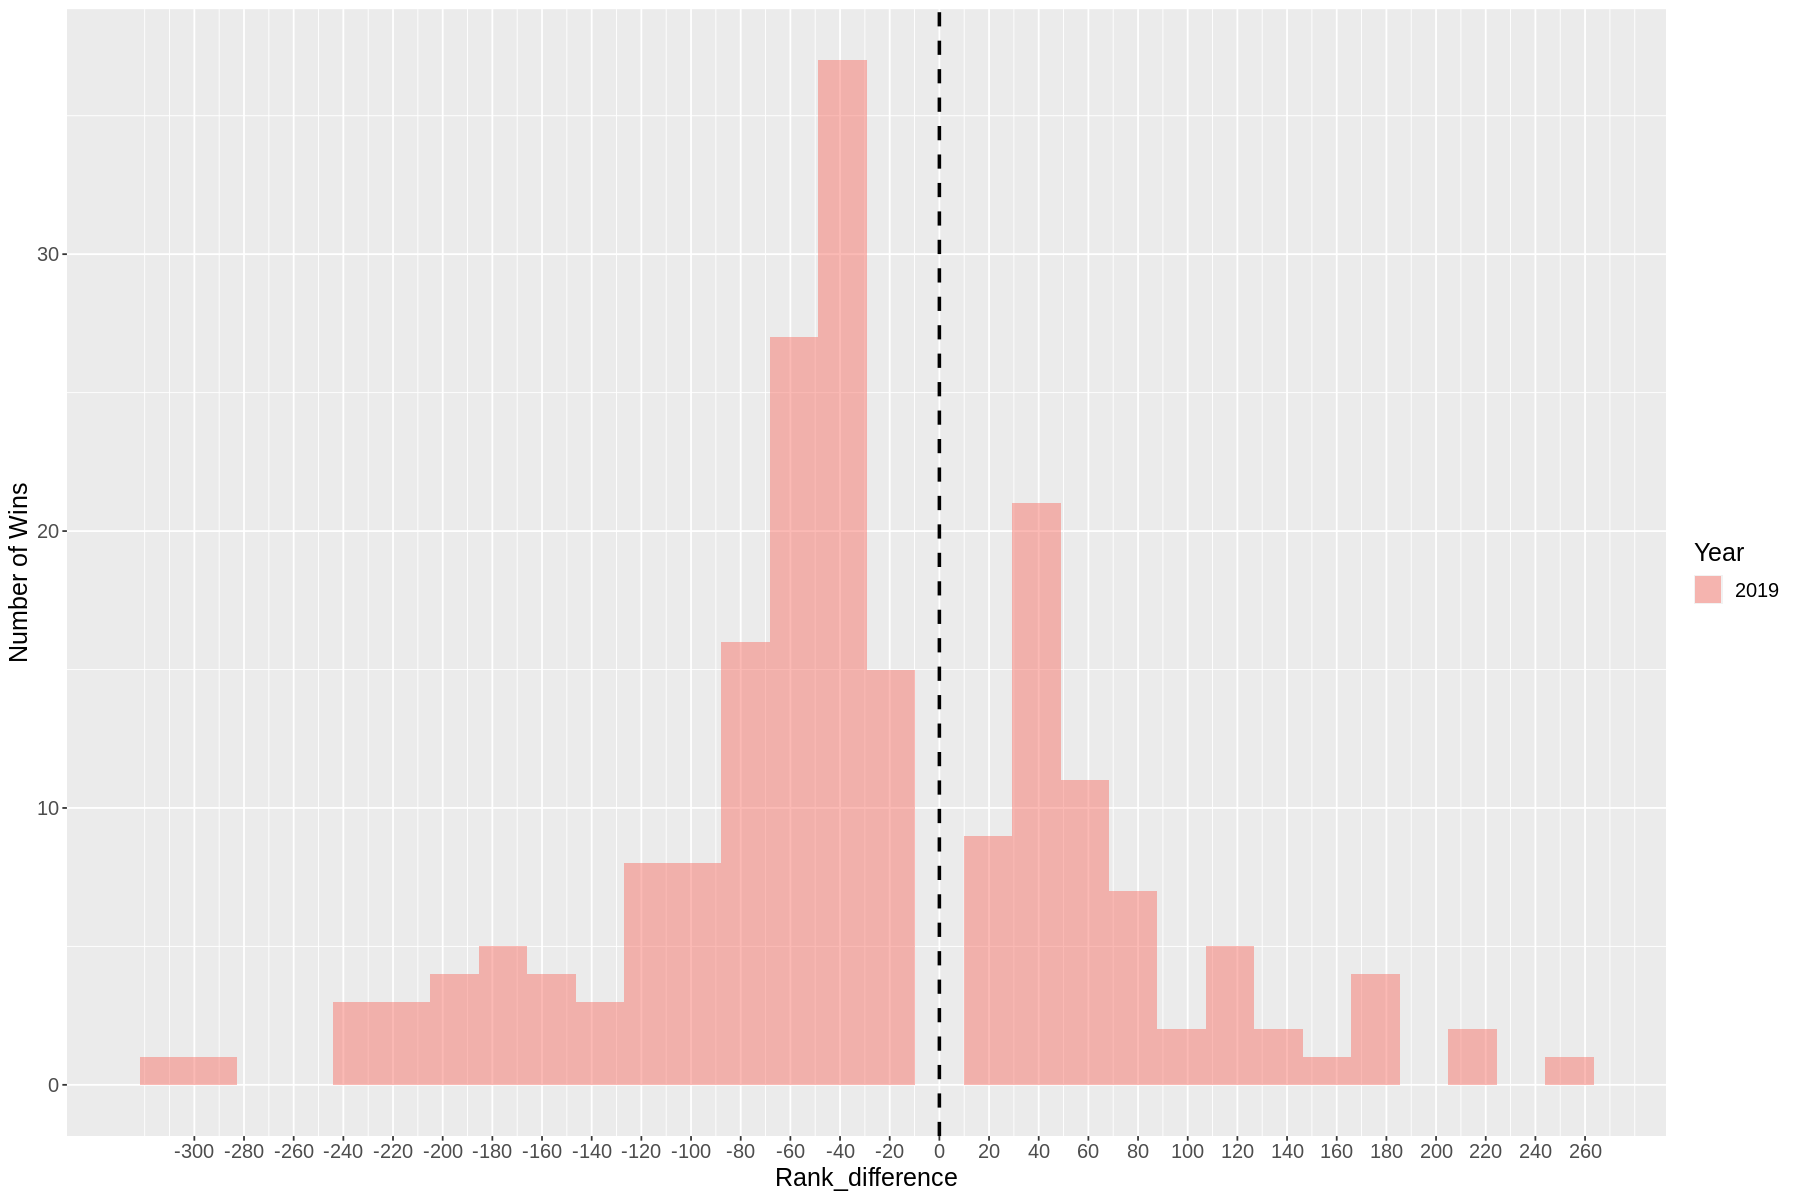

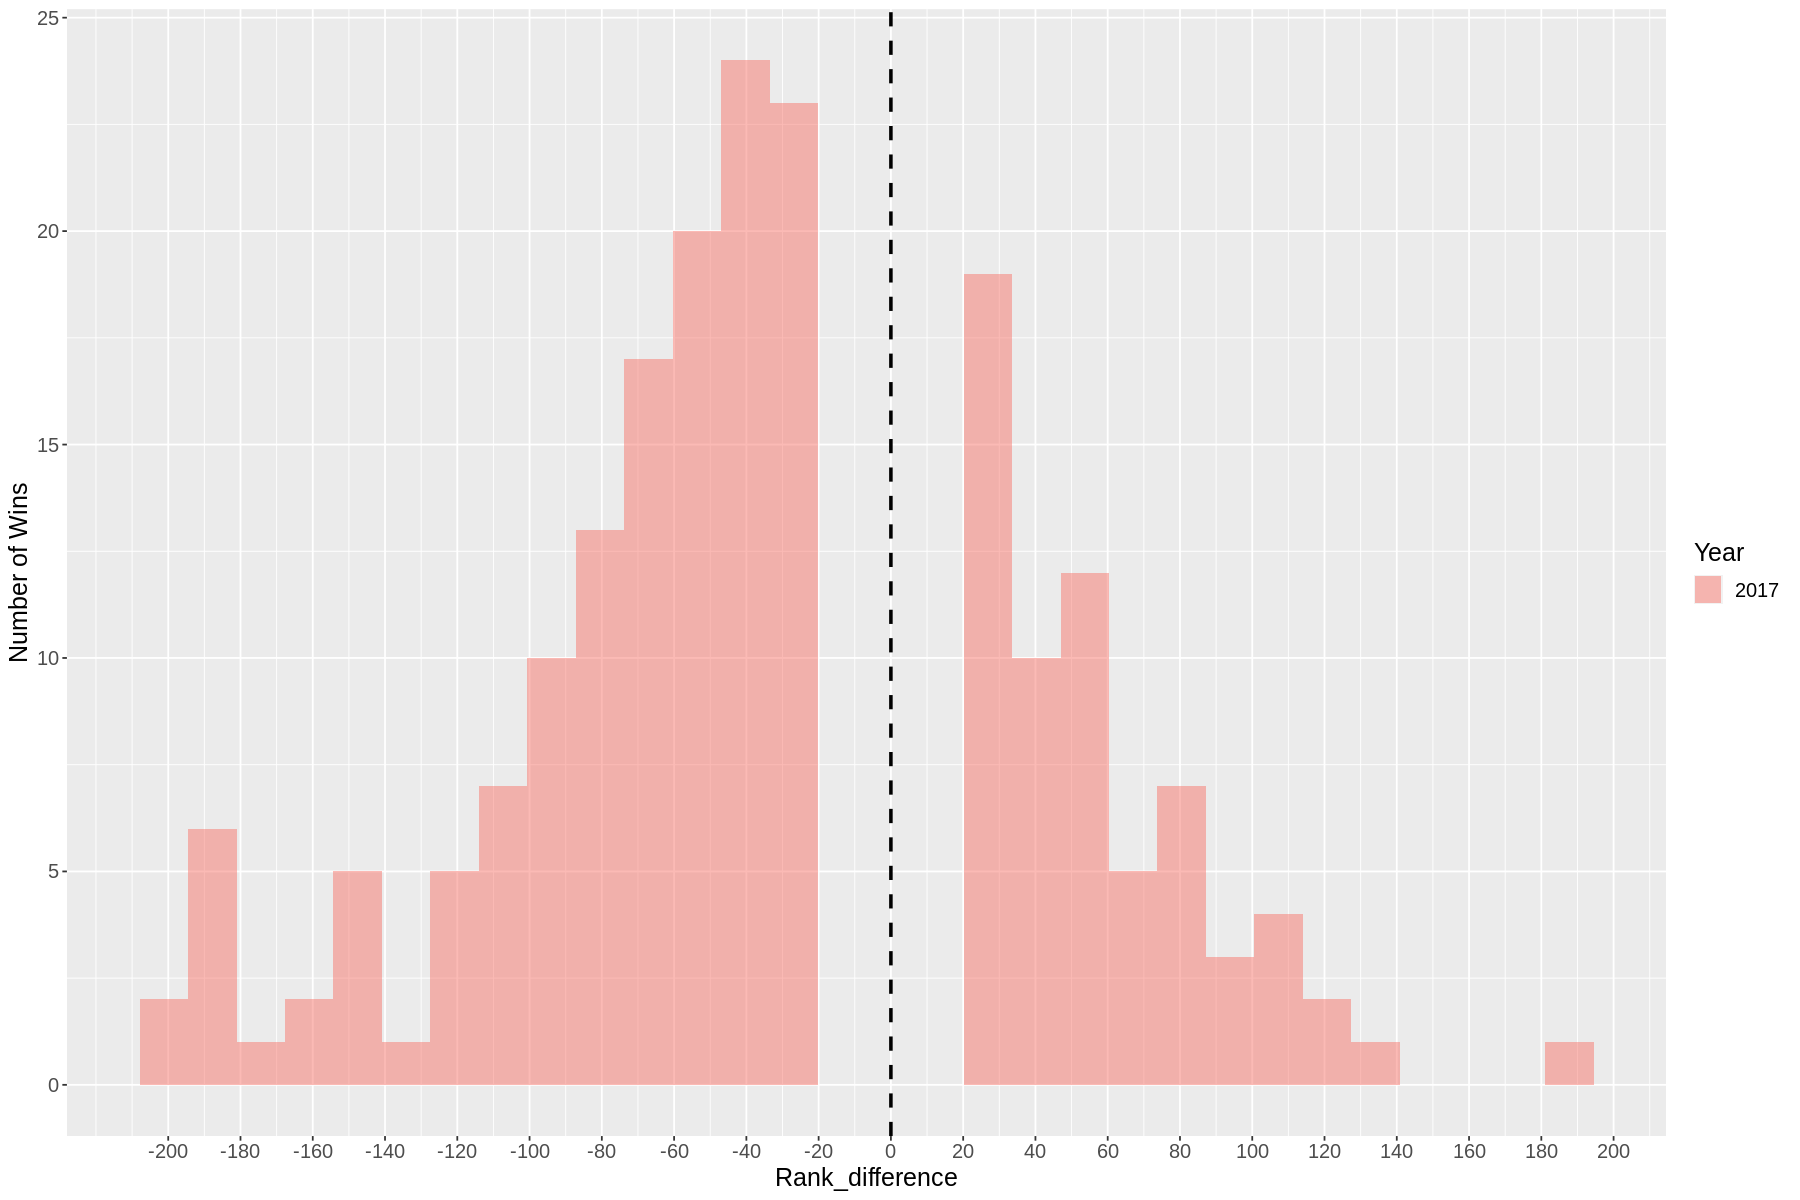

In [115]:
#Visulization
options(repr.plot.height = 10, repr.plot.width = 15)
rank_diff <- atp %>%
    mutate(rank_diff = winner_rank - loser_rank)
rank_diff_plot_2019 <- rank_diff %>%
    filter(Year == 2019) %>%
    filter(rank_diff >20 | rank_diff < -20) %>%
    slice(1:200) %>%
    ggplot(aes(x = rank_diff, fill = Year)) +
    geom_histogram(alpha = 0.5, position = "identity")+
    geom_vline(xintercept = 0, linetype = "dashed", size = 1.0) +
    labs(x = "Rank_difference", y = "Number of Wins") +
    scale_x_continuous(breaks = seq(-300, 260, 20)) +
    theme(text = element_text(size = 15))

rank_diff_plot_2017 <- rank_diff %>%
    filter(Year == 2017) %>%
    filter(rank_diff >20 | rank_diff < -20) %>% 
    filter(rank_diff <200 & rank_diff > -200) %>%
    slice(1:200) %>%
    ggplot(aes(x = rank_diff, fill = Year)) +
    geom_histogram(alpha = 0.5, position = "identity")+
    geom_vline(xintercept = 0, linetype = "dashed", size = 1.0) +
    labs(x = "Rank_difference", y = "Number of Wins") +
    scale_x_continuous(breaks = seq(-200, 200, 20)) +
    theme(text = element_text(size = 15))

rank_diff_plot_2019

rank_diff_plot_2017

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



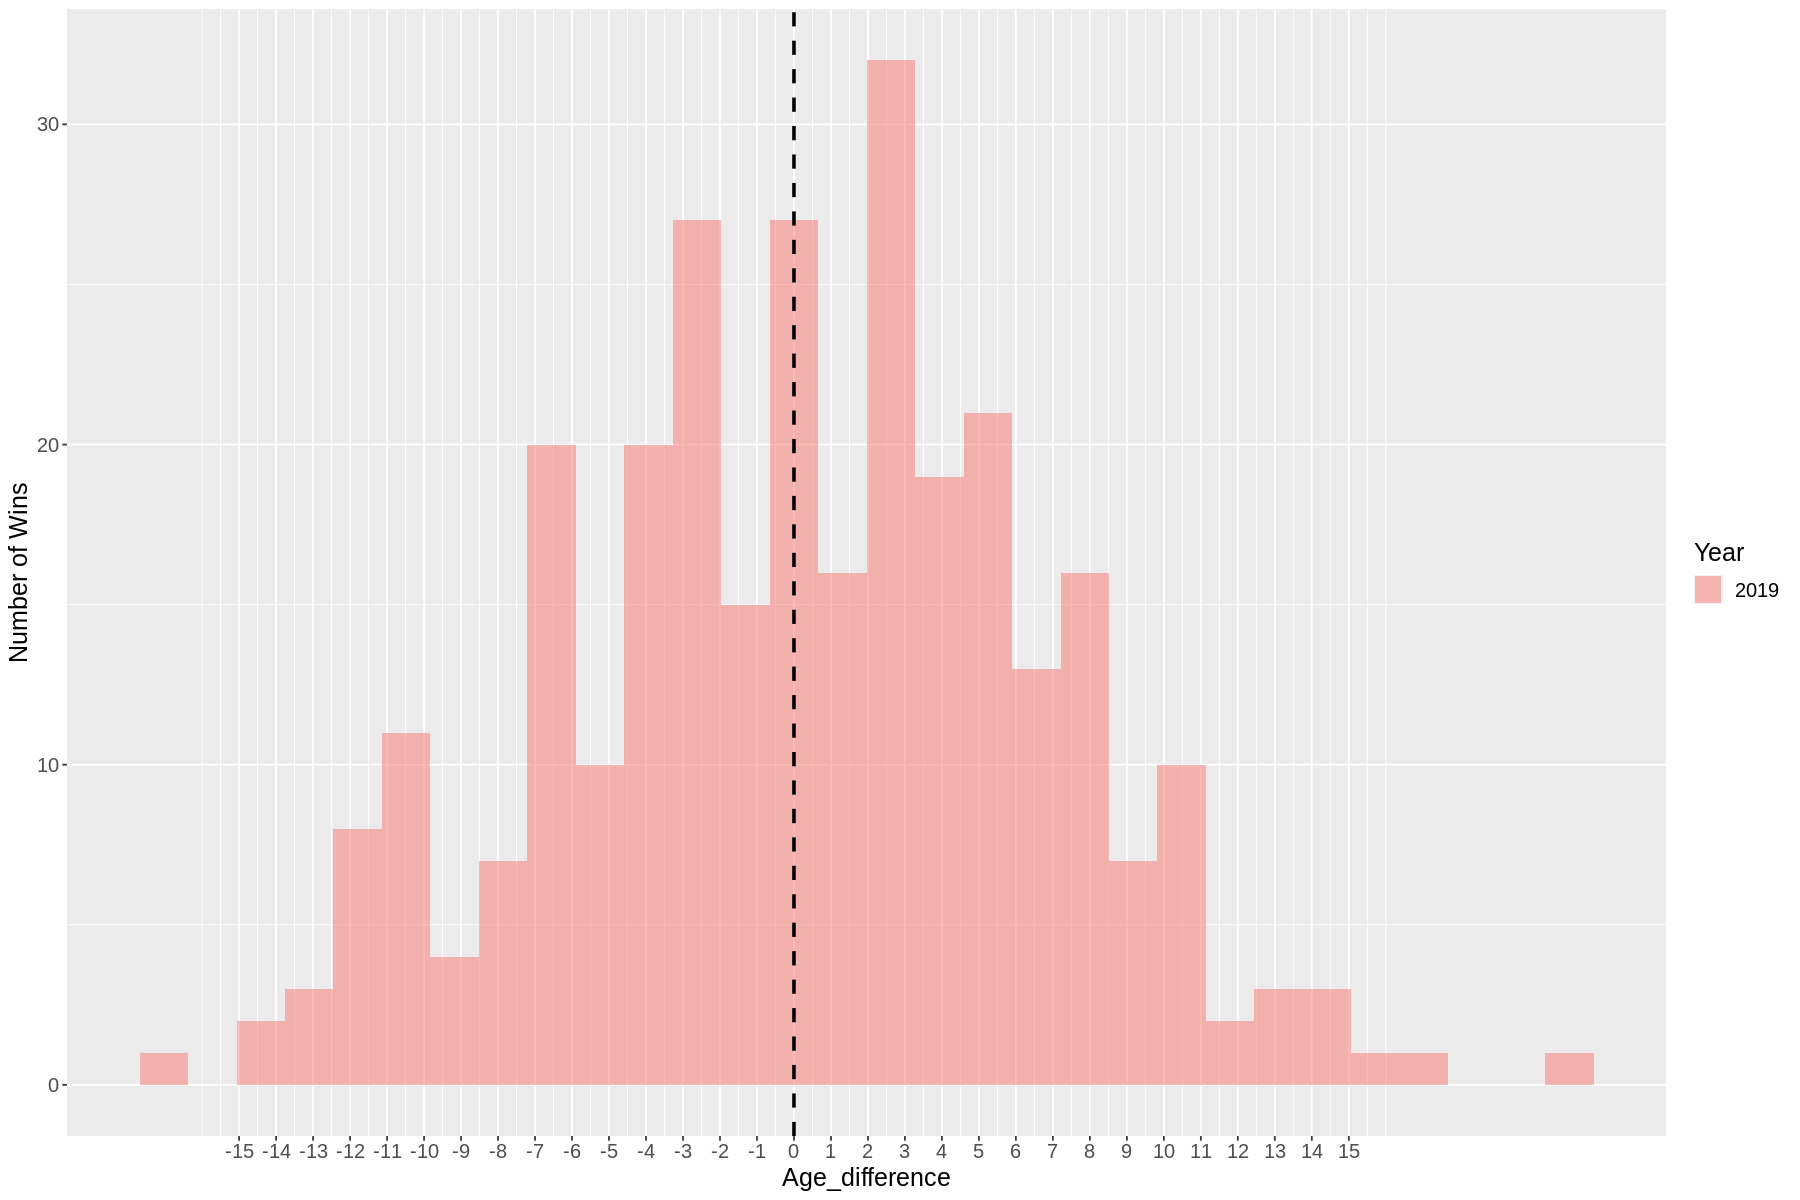

In [105]:
options(repr.plot.height = 10, repr.plot.width = 15)
age_diff <- atp %>%
    mutate(age_diff = winner_age - loser_age) %>%
    mutate(age_diff = as.integer(age_diff))
age_diff_plot_2019 <- age_diff %>%
    filter(Year == 2019) %>%
    slice(1:300) %>%
    ggplot(aes(x = age_diff, fill = Year)) +
    geom_histogram(alpha = 0.5, position = "identity")+
    geom_vline(xintercept = 0, linetype = "dashed", size = 1.0) +
    labs(x = "Age_difference", y = "Number of Wins") +
    scale_x_continuous(breaks = seq(-15, 15, 1)) +
    theme(text = element_text(size = 15))
age_diff_plot_2019